<a href="https://colab.research.google.com/github/Zillth/Evolutionary-algorithm/blob/main/Evolutionary_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evolutionary Algorithm
> An evolutionary algorithm is a family of optimization algorithms inspired by the theory of natural selection and evolution in biology. These algorithms work by evolving a population of candidate solutions to a problem, using genetic operators such as mutation, crossover, and selection.

> The basic idea behind an evolutionary algorithm is to start with a population of potential solutions to a problem, where each solution is represented as a set of parameters or a genome. The algorithm then applies genetic operators to the population to generate new candidate solutions, and evaluates the fitness of each solution based on some objective function or fitness criteria. The fittest individuals are then selected to be parents of the next generation, and the process is repeated for a number of generations, until a satisfactory solution is found.

> There are different variants of evolutionary algorithms, such as genetic algorithms, evolutionary strategies, evolutionary programming, and genetic programming. Each variant has its own set of genetic operators, selection strategies, and parameter settings, depending on the nature of the problem being solved.

> Evolutionary algorithms are used in a wide range of applications, such as engineering design, optimization of complex systems, machine learning, and bioinformatics. They are particularly useful for problems where the search space is large, complex, or poorly understood, and where traditional optimization techniques may not be effective.

## What are we gonna do?
> Here we are gonna implemented this algorithm in a continous space with 3 differents test functions (Sphere, Rosenbrock, Ackley).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statistics

> First of all, lets import all the libraries that we are gonna use.

In [2]:
def sphere(x):
    result = np.sum(np.power(x,2))
    return result

def rosenbrock(x):
    result = 0
    for i in range(len(x) - 1):
        result += np.multiply(100, np.power((np.power(x[i],2) - x[i + 1]), 2)) + np.power(1 - x[i], 2)
    return result

def ackley(x):
    first_combination = np.sum(np.square(x))
    second_combination = np.sum(np.cos(2*np.pi*x))
    n = len(x)
    n1 = np.divide(first_combination, n)
    n2 = np.divide(second_combination, n)
    return np.multiply(-20, np.exp(np.multiply(-0.2, np.sqrt(n1)))) - np.exp(n2) + np.exp(1) + 20

print(sphere(np.array([0,0,0,0,0,0,0,0,0,0])))
print(rosenbrock(np.array([1,1,1,1,1,1,1,1,1,1])))
print(ackley(np.array([0,0,0,0,0,0,0,0,0,0])))

0
0
0.0


> After that, we define our test functions whoose have this characteristics:
* 'x' is a vector of $1 * n$ in our case $n = 10$
* The Sphere function have his global minimum in 0 with an input vector (0,...,0) and the items of the input are in range [-5.12, 5.12]
* The Rosenbrock function have his global minimum in 0 with an input vector (1,...,1) and the items of the input are in range [-2.048, 2.048]
* The Ackley function have his global minimum in 0 with an input vector (0,...,0) and the items of the input are in range [-32.768, 32.768]

> Then we just test it out for make sure the function precisely get the correct values, We have to do this because in computing maths it's very common to obtain values that are mathematicaly incorrect but very close to the correct one, also is the reason why using the numpy's library

## Codification
> Codification is the process of representing candidate solutions in a form that can be easily manipulated by the algorithm. This typically involves encoding each solution as a string of symbols, where each symbol corresponds to a specific feature or parameter of the solution.

> For example, suppose we want to optimize a function that takes as input a vector of real numbers. One way to encode a candidate solution is to represent the vector as a string of binary digits, where each digit corresponds to one element of the vector. We could then apply genetic operators such as mutation and crossover to the string, and decode the resulting string back into a vector for evaluation.

> The choice of codification can have a significant impact on the performance of the evolutionary algorithm. A good codification should allow for efficient and effective manipulation of the candidate solutions, while also ensuring that the solutions produced by the algorithm are valid and meaningful. The codification should also be chosen to match the problem domain and the type of variables being optimized.

> Common types of codifications include binary, integer, real-valued, and permutation-based encoding. In addition, hybrid codifications that combine multiple types of encoding may be used to better capture the characteristics of the problem being solved.

> Overall, codification is an important consideration in evolutionary algorithms, and choosing an appropriate encoding can help to improve the performance and effectiveness of the algorithm.

In [3]:
def int_to_binary(x, num_bits):
    """
    
    Convert an integer to a binary number with a certain bits.

    Arguments:
    x (int): Number to convert.
    num_bits: Length desired for the binary
    
    Return:
    str: The number in binary representation.
    
    """
    binary = ''
    for _ in range(num_bits):
        binary = str(x & 1) + binary
        x >>= 1
    return binary

class codification():
    """
    
    Object that serves to encode and decode populations.
    
    Arguments:
    limits (dic{2}): The interval of the function, its a dictionary with 'upper' and 'lower' items.
    accuracy (int): Number of decimals.
    
    """
    def __init__(self, limits, accuracy):
         self.limits = limits
         self.accuracy = accuracy
         self.digits_number = int(np.ceil(np.log2(np.multiply(limits.get('upper'), np.power(10, accuracy)) - np.multiply(limits.get('lower'), np.power(10, accuracy)))))
         
    def binary_codification(self, population):
        coded_population = []
        for xi in population:
            distance = int(np.multiply(xi - self.limits.get('lower'), np.power(10, self.accuracy)))
            binary = int_to_binary(distance, self.digits_number)
            coded_population.append(binary)
        return coded_population

    def binary_decodification(self, coded_population):
        population = []
        for x in coded_population:
            distance = np.divide(int(x, 2), np.power(10, self.accuracy))
            decimal = np.round(self.limits.get('lower') + distance, self.accuracy)
            population.append(decimal)
        return population

codificator = codification(limits={'lower': -32.768, 'upper': 32.768}, accuracy=4)
p = [-16.49, 16.44, -6.8, -4.73, -31.4, -17.11, -16.0, -20.42, 3.21, -7.27]
b = codificator.binary_codification(p)
print(b)
d = codificator.binary_decodification(b)
print(d)

['00100111101111011100', '01111000001000110000', '00111111011001100000', '01000100011100111100', '00000011010101110000', '00100110001110100100', '00101000111100000000', '00011110001001010111', '01010111110101100100', '00111110010000000100']
[-16.49, 16.44, -6.8, -4.73, -31.4, -17.11, -16.0, -20.4201, 3.21, -7.27]


> In this occasion we choose a binary codification because it is considered the pionir of the codification algorithms, the first funtion allow us to convert any integer into his binary form with a certain number of digits, the other two are just the encoder and decorder functions.

> Also we test it out for make sure it works as it has to.


## Selection
> Selection is a process by which individuals (potential solutions) are chosen from a population to participate in the creation of new individuals for the next generation. The goal of selection is to increase the quality of solutions in the population over time, leading to better and better solutions.

> In selection, individuals are typically selected based on their fitness, which is a measure of how well they solve the problem at hand. In a typical evolutionary algorithm, the higher the fitness of an individual, the higher its probability of being selected for reproduction.

> There are many different selection methods that can be used in evolutionary algorithms, including roulette wheel selection, tournament selection, rank-based selection, and many more. The choice of selection method depends on the specific problem being solved and the characteristics of the population.

> Overall, selection is a crucial component of evolutionary algorithms, as it determines which individuals get to contribute to the creation of new solutions and therefore plays a significant role in the optimization process.

### Roulette wheel
> Roulette wheel selection is a popular method of selection used in evolutionary algorithms, especially in genetic algorithms. It is a selection technique that is based on the concept of a roulette wheel, where the probability of an individual being selected is proportional to its fitness.

> In roulette wheel selection, each individual in the population is assigned a slice of a roulette wheel that is proportional to its fitness value. The size of each slice is determined by the individual's fitness value divided by the sum of the fitness values of all individuals in the population. Then, a random number between 0 and 1 is generated, and the individual whose slice contains that number is selected for the next generation.

In [4]:
def fitness(xi, fun):
    return np.divide(100, 1 + fun(xi))

def roulette_wheel_selection(population, fun, individual_number):
    fitness_sum = 0
    samples_number = 0
    probabilities = []
    individuals = []
    fitness_values = []
    for sample in population:
        fit = fitness(sample, fun)
        fitness_values.append(fit)
        fitness_sum += fit
        samples_number += 1
        
    for i in range(len(fitness_values)):
        probabilities.append(np.divide(fitness_values[i], fitness_sum))

    for _ in range(individual_number):
        random_number = np.random.random()
        sum = 0
        index = -1
        while sum < random_number:
            index = (index + 1) if index < (samples_number - 1) else 0
            sum += probabilities[index]
        individuals.append(population[index - 1])
    return individuals
        
pop = np.array([ 
  [ 5.9114, -7.5801], [  2.6882, -30.8006], [-4.4083, 30.8689], [29.986 , 20.1955], [-8.1023,  0.2158], 
  [26.8812, 26.5136], [ 23.0116, -29.5273], [10.3473, 22.4978], [28.6965, 14.6669], [-14.6167,  31.7161], 
  [ 25.6892, -15.9785], [ 0.1038, -1.8419], [ 5.4367, 22.553 ], [-23.8639, -19.4228]
])
print(roulette_wheel_selection(population=pop, fun=ackley, individual_number=3))

[array([-14.6167,  31.7161]), array([26.8812, 26.5136]), array([26.8812, 26.5136])]


> We choose roulette wheel selection because is an effective method for selecting individuals in evolutionary algorithms, as it tends to favor high-fitness individuals while still allowing lower-fitness individuals to have a chance of being selected. However, it can be computationally expensive for large populations, and can also lead to premature convergence if there are few high-fitness individuals in the population.

### Tournament
> Select individuals for reproduction based on their fitness values. It is a popular method because it is simple and efficient.

> In tournament selection, a set of individuals are randomly chosen from the population, and then they are evaluated based on their fitness values. The individual with the highest fitness value is selected as a parent for the next generation. This process is repeated until the desired number of parents is obtained.

> The size of the tournament is a parameter that can be adjusted to control the balance between exploration and exploitation. A larger tournament size leads to stronger selection pressure and can result in faster convergence to a good solution, but may also lead to premature convergence or getting trapped in local optima. A smaller tournament size, on the other hand, allows for more exploration of the solution space but may result in slower convergence.

> Tournament selection is often used in combination with other selection methods, such as roulette wheel selection or rank-based selection, to balance the exploration and exploitation of the solution space.

In [5]:
def tournament_selection(population, n_selected, k_competitors, fun):
    winners = []
    while len(winners) < n_selected:
        random_competitors = np.random.permutation(population)[:k_competitors]
        max_fit = {
            'competitor': [],
            'value': 0
        }
        for competitor in random_competitors:
            fit_value = fitness(competitor, fun)
            if max_fit.get('value') < fit_value:
                max_fit['competitor'] = competitor
                max_fit['value'] = fit_value            
        winners.append(max_fit.get('competitor'))
    return winners

pop = [[-27.5754, -31.15], [-16.8675, 26.5542], [-23.8222, -13.8394], [-17.4758, -28.4141], [8.557, 15.6708], [32.0947, 26.7037], [-22.2911, 12.8261], [32.768, -24.5354], [-10.435, -29.6133], [-5.8511, 5.2212], [-17.2686, -32.7146], [1.3684, 23.8438]]

print(tournament_selection(population=pop, n_selected=3, k_competitors=2, fun=ackley))

[array([-27.5754, -31.15  ]), array([ 1.3684, 23.8438]), array([-5.8511,  5.2212])]


## Crossover
> Is a genetic operator that involves the exchange of genetic information between two parent individuals to produce one or more offspring. The process of crossover mimics the biological process of sexual reproduction.

> In crossover, two parent individuals are selected from a population based on their fitness. Then, a crossover point is chosen randomly along the length of the parent chromosomes. The genetic material to the left of the crossover point in one parent is exchanged with the genetic material to the left of the crossover point in the other parent, resulting in two new offspring individuals. The crossover operation can be performed multiple times on the same pair of parents to produce multiple offspring.

> Crossover helps to introduce genetic diversity in the population and can lead to the production of new and better solutions in the search space. However, the effectiveness of crossover depends on the selection of appropriate crossover points and the choice of parent individuals.

### Two-points-crossver

> Two-point crossover is a type of crossover operation commonly used in genetic algorithms. In two-point crossover, two random crossover points are selected along the length of the parent chromosomes. The genetic material between the two crossover points is exchanged between the parent individuals to create new offspring individuals.

In [6]:
def two_point_crossover(parents, crossover_probability):
    """
    
    Algorithm for cross a population by permutating 2 random points.
    
    Arguments:
    parents (array(array(binary))): The population for crossing.
    crossover_probability (float): Probability for crossing, is a number between 0 and 1.
    
    Return:
    array(array(binary)): Offsprings resulting of the permutations.
    
    """
    offsprings = []
    for i in range(0, len(parents), 2):
        if np.random.rand() < crossover_probability:
            if i + 1 < len(parents):
                parent1 = parents[i]
                parent2 = parents[i + 1]
                descendant1 = []
                descendant2 = []
                for j in range(len(parent1)):
                    parents_lenght = len(parent1[j])
                    spot1 = spot2 = None
                    while spot1 == spot2:
                        spot1, spot2 = np.random.randint(low=1, high=parents_lenght - 1, size=2, dtype=int)
                    if spot2 < spot1:
                        spot1, spot2 = spot2, spot1
                    descendant1.append(parent1[j][:spot1] + parent2[j][spot1:spot2] + parent1[j][spot2:])
                    descendant2.append(parent2[j][:spot1] + parent1[j][spot1:spot2] + parent2[j][spot2:])
                offsprings.append(descendant1)
                offsprings.append(descendant2)
    return offsprings
    

### Uniform crossover
> In uniform crossover, two parent chromosomes are selected randomly from the population, and a new child chromosome is created by exchanging genetic information between them. Unlike other types of crossover operators, uniform crossover involves choosing individual bits from the parent chromosomes with a certain probability, rather than selecting entire sub-strings.

> For each bit position, a random number between 0 and 1 is generated, and if this number is less than a predefined crossover probability, the corresponding bit is selected from one of the parents and copied to the child. Otherwise, the bit is selected from the other parent. This process is repeated for all bits in the chromosome, resulting in a new chromosome that is a combination of genetic information from both parents.

> Uniform crossover is useful because it can help to maintain diversity in the population, which is important for preventing premature convergence and discovering a wide range of high-quality solutions. However, it may not be suitable for all types of problems, and different types of crossover operators may be more effective for different problem domains.

In [7]:
def uniform_crossover(parents, crossover_probability):
    """
    
    Algorithm for cross a population by permutating every bit between every parent.
    
    Arguments:
    parents (array(array(binary))): The population for crossing.
    crossover_probability (float): Probability for crossing, is a number between 0 and 1.
    
    Return:
    array(array(binary)): Offsprings resulting of the permutations.
    
    """
    
    offsprings = []
    for i in range(0, len(parents), 2):
        if np.random.rand() < crossover_probability:
            if i + 1 < len(parents):
                parent1 = parents[i]
                parent2 = parents[i + 1]
                offspring1 = []
                offspring2 = []
                for j in range(len(parent1)):
                    indexes = []
                    while len(indexes) < int(len(parent1[j]) / 2):
                        n = np.random.randint(0, 20)
                        if n not in indexes:
                            indexes.append(n)
                    build1 = ''
                    build2 = ''
                    for k in range(len(parent1[j])):
                        if k in indexes:
                            build1 += parent1[j][k]
                            build2 += parent2[j][k]
                        else:
                            build1 += parent2[j][k]
                            build2 += parent1[j][k]
                    offspring1.append(build1)
                    offspring2.append(build2)
                offsprings.append(offspring1)
                offsprings.append(offspring2)
    return offsprings

## Mutation
> Mutation helps to increase the diversity of the population and prevent the algorithm from getting stuck in local optima.

> In mutation, a small random change is applied to a selected chromosome with a certain probability. This change can be as simple as flipping a bit in a binary string, or it can involve more complex operations, such as adding or deleting a gene, swapping genes between different positions, or changing the value of a numerical parameter. The magnitude of the mutation is typically small, so that the overall structure of the solution is not drastically altered.

> The mutation rate is an important parameter in evolutionary algorithms, which controls how often mutations occur in the population. If the mutation rate is too low, the algorithm may get stuck in local optima, whereas if it is too high, the population may converge too quickly and lose diversity. The mutation rate should be chosen based on the problem domain and the characteristics of the solution space.

> In summary, mutation is a genetic operator used in evolutionary algorithms to introduce random changes in the genetic material of candidate solutions, in order to increase diversity and explore the solution space.

In [8]:
def mutation(chromosome, mutation_probability):
    """
    
    Mutation operator that randomly changes one allele of the chromosome. 
    The allele value can change from 0 to 1 or vice versa with a given probability.
    
    """
    new_chromosome = []
    for gen in chromosome:
        gen = list(gen)
        alelo = np.random.randint(len(gen))
        r = np.random.random()
        if r < mutation_probability:
            if gen[alelo] == '0':
                gen[alelo] = '1'
            else:
                gen[alelo] = '0'
        gen = ''.join(gen)
        new_chromosome.append(gen)
    return new_chromosome

Now that we have every aspect of an evolutionary algorithm, we can just do some basic functions for the general working of the program.

> rand_solution is a function which privide us a random solution between certain interval and accuracy, it returns a vector of n dimentions.

> population_repair is function needed for prevent that certain individual after mutate cross the limit of the intervals.

> Genetic algorithm is the main algorithm.

In [9]:
def rand_solution(interval, dimentions, accuracy):
    lower_limit = interval.get('lower')
    upper_limit = interval.get('upper')
    return np.round(np.multiply((upper_limit - lower_limit), np.random.sample(dimentions)) + lower_limit, accuracy)


def population_repair(population, codificator):
    population_repaired = []
    for individual in population:
        individual_decoded = codificator.binary_decodification(individual)
        individual_fixed = []
        for gen in individual_decoded:
            if gen > codificator.limits.get('upper'):
                individual_fixed.append(codificator.limits.get('upper'))
            else:
                individual_fixed.append(gen)
        population_repaired.append(individual_fixed)
    return population_repaired


def genetic_algorithm(number_population, accuracy, dimentions, interval, fun, parents_number, crossover_type, 
                      crossover_probability, mutation_probability, tournament_competitors, 
                      function_solution, epsilon, replacement_rate):
    # Generar población incial
    codificator = codification(limits=interval, accuracy=accuracy)
    population = [rand_solution(interval, dimentions, accuracy)
                  for _ in range(number_population)]
    population_fitness = [fitness(individual, fun) for individual in population]
    max_index_fitness = population_fitness.index(np.max(population_fitness))
    best_individual = population[max_index_fitness]
    best_individual_value = fun(best_individual)
    best = []
    min_index_fitness = population_fitness.index(np.min(population_fitness))
    worst_individual = population[min_index_fitness]
    worst_individual_value = fun(worst_individual)
    worst = [] 
    generation = 0
    function_values = []
    print("Generación: {}, Mejor individuo: {}, Aptitud: {}, Valor: {}".format(
        generation, best_individual, population_fitness[max_index_fitness], best_individual_value))

    while best_individual_value - function_solution > epsilon and worst_individual_value - best_individual_value > epsilon:
        generation += 1
        parents = roulette_wheel_selection(population, fun, parents_number)
        parents = [codificator.binary_codification(parent) for parent in parents]
        offsprings = []
        if crossover_type == 1:
            offsprings = two_point_crossover(parents, crossover_probability)
        elif crossover_type == 2:
            offsprings = uniform_crossover(parents, crossover_probability)
        offsprings = [mutation(offspring, mutation_probability) for offspring in offsprings]
        offsprings = population_repair(offsprings, codificator)
        offsprings = tournament_selection(offsprings, int(
            len(offsprings) * replacement_rate), tournament_competitors, fun)
        for offspring in offsprings:
            index = population_fitness.index(np.min(population_fitness))
            pf = fitness(offspring, fun)
            if population_fitness[index] < pf:
                population[index] = offspring
                population_fitness[index] = pf
        
        max_index_fitness = population_fitness.index(np.max(population_fitness))
        best_individual = population[max_index_fitness]
        best_individual_value = fun(best_individual)
        min_index_fitness = population_fitness.index(np.min(population_fitness))
        worst_individual = population[min_index_fitness]
        worst_individual_value = fun(worst_individual)
        print("Generación: {}, Mejor individuo: {}, Aptitud: {}, Valor: {}".format(generation, best_individual, population_fitness[max_index_fitness], best_individual_value))
        best.append(population_fitness[max_index_fitness])
        worst.append(population_fitness[min_index_fitness])
        function_values.append(worst_individual_value) 
    return best, worst, function_values

After everything we have done, now is time to test it.

Generación: 0, Mejor individuo: [ -4.0659 -11.8705   4.4754  10.4001   4.9518], Aptitud: 5.430386129533588, Valor: 17.414896770625948
Generación: 1, Mejor individuo: [ -4.0659 -11.8705   4.4754  10.4001   4.9518], Aptitud: 5.430386129533588, Valor: 17.414896770625948
Generación: 2, Mejor individuo: [  6.2508 -11.8585   4.2709   7.0851  -1.1988], Aptitud: 5.729572356643296, Valor: 16.45330956228391
Generación: 3, Mejor individuo: [  6.2508 -11.8585   4.2709   7.0851  -1.1988], Aptitud: 5.729572356643296, Valor: 16.45330956228391
Generación: 4, Mejor individuo: [  6.2508 -11.8585   4.2709   7.0851  -1.1988], Aptitud: 5.729572356643296, Valor: 16.45330956228391
Generación: 5, Mejor individuo: [  6.2508 -11.8585   4.2709   7.0851  -1.1988], Aptitud: 5.729572356643296, Valor: 16.45330956228391
Generación: 6, Mejor individuo: [  6.2508 -11.8585   4.2709   7.0851  -1.1988], Aptitud: 5.729572356643296, Valor: 16.45330956228391
Generación: 7, Mejor individuo: [  6.2508 -11.8585   4.2709   7.085

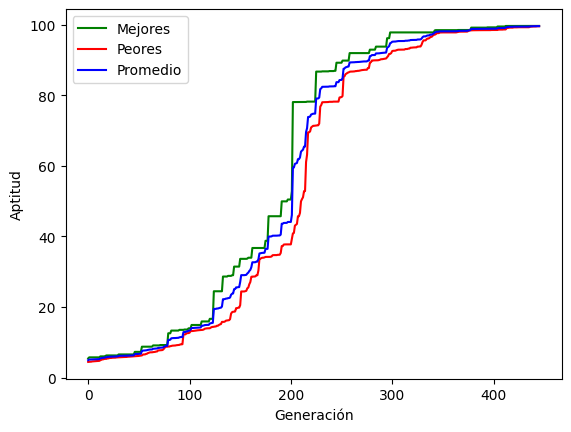

In [10]:
accuracy = 4
dimentions = 5
tournament_competitors = 2
epsilon = 0.001
function_solution = 0
replacement_rate = 0.3
np.random.seed(11)
interval = {
    'lower': -32.768,
    'upper': 32.768
}
# ------------------------
number_population = 20
parents_number = int(number_population * 0.75)
# Tipo de cruza --> 1 = dos puntos, 2 = uniforme
crossover_type = 2
crossover_probability = 0.7
mutation_probability = 0.25
best, worst, values = genetic_algorithm(number_population, accuracy, dimentions, interval, ackley, parents_number, crossover_type, crossover_probability,
                  mutation_probability, tournament_competitors, function_solution, epsilon, 
                  replacement_rate)

mean = np.divide(np.array(worst) + np.array(best), 2)

print("El valor máximo de la función es:", np.max(values))
print("El valor minimo de la función es:", np.min(values))
stdev = statistics.stdev(values)
print("La desviación estándar es:", stdev)

plt.plot(range(0, len(best)), best, color = 'green', label='Mejores')
plt.plot(range(0, len(worst)), worst, color = 'red', label='Peores')
plt.plot(range(0, len(mean)), mean, color = 'blue', label='Promedio')
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.legend()
plt.show()